In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

In [3]:
df=pd.read_csv('housing_data.csv')

In [4]:
df

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...,...
1042,387652,3504,2.5,5,0.90,0,1
1043,391842,3003,3.5,4,0.46,88,1
1044,394532,3361,3.5,4,0.71,1,1
1045,432845,3250,2.5,3,0.53,23,1


In [7]:
df.duplicated().sum()

12

In [9]:
df.drop_duplicates(inplace=True,ignore_index=True)

<Axes: >

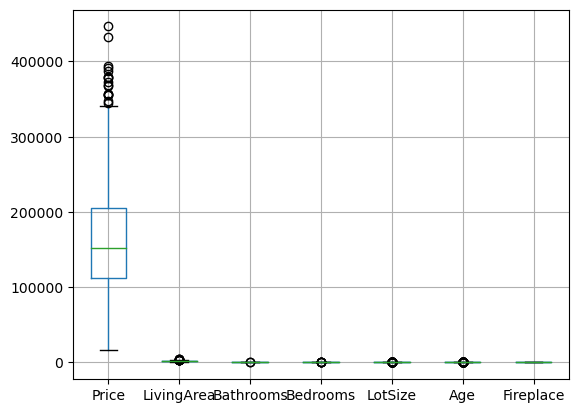

In [10]:
### Outliers
df.boxplot()

In [12]:
def outlier_cappping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_cappping(df,col)


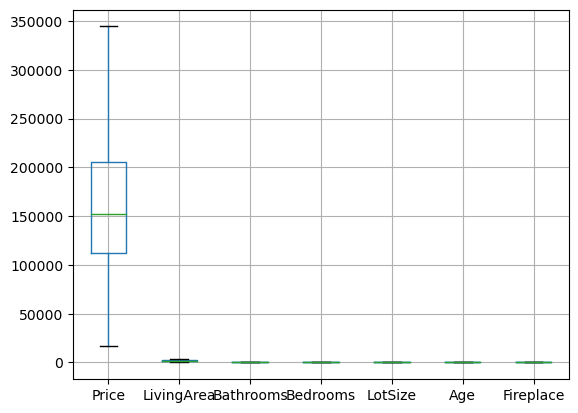

In [13]:
df.boxplot()
plt.show()

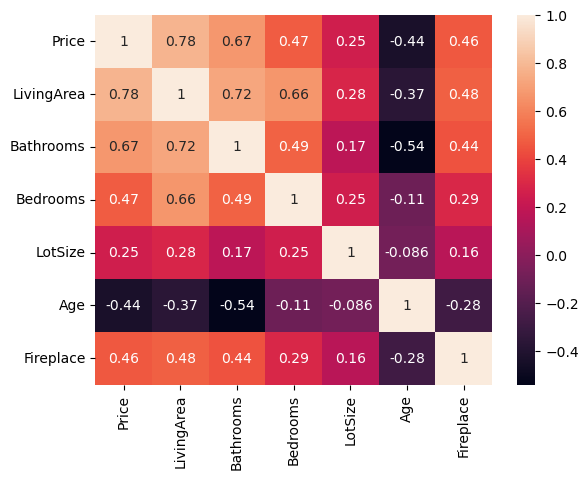

In [17]:
###  Heatmap
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
from sklearn.feature_selection import f_regression
target=df[['Price']]
features=df.drop(columns=['Price'])
features.columns

Index(['LivingArea', 'Bathrooms', 'Bedrooms', 'LotSize', 'Age', 'Fireplace'], dtype='object')

In [25]:
f_reg=f_regression(features,target)
f_reg[0]

array([1599.24342786,  853.25791484,  297.34351746,   69.13633957,
        245.38929244,  281.57553144])

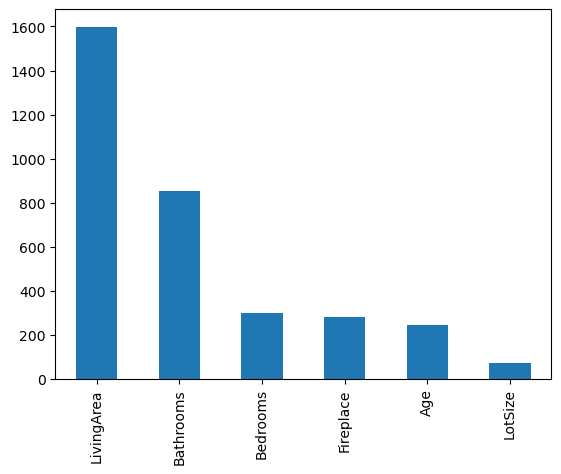

In [27]:
f_reg=f_regression(features,target)
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()